# Bike Sharing Assignment

## Step1: Reading and Understanding Dataset

In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
lin_dataset=pd.read_csv('day.csv')

In [3]:
#Displaying the dataset
lin_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Basic Information about the data
lin_dataset.shape

(730, 16)

The given dataset has 730 rows and 16 columns

In [5]:
lin_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking the column content
lin_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Number of Missing values in the dataset
print('Number of Missing values in the dataset:',lin_dataset.isnull().sum().sum())
#Number of unique values in the dataset
print('Number of Unique values in the dataset:',lin_dataset.nunique().sum())
#Number of Duplicates in the dataset
print('Number of Duplicate data in dataset:',lin_dataset.duplicated().sum())

Number of Missing values in the dataset: 0
Number of Unique values in the dataset: 5900
Number of Duplicate data in dataset: 0


In [8]:
#Checking the columns present
lin_dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step2: Cleaning the Dataset

In [9]:
#Removing 'dteday' because it has no effect on our analysis
lin_dataset=lin_dataset.drop(['dteday'],axis=1)
#Removing 'instant' because it is a duplicate index column
lin_dataset=lin_dataset.drop(['instant'],axis=1)
#Removing 'casual' and 'registered' because we need to build the model taking cnt as the target variable
lin_dataset=lin_dataset.drop(['casual','registered'],axis=1)

In [10]:
#Encoding the 'season' column into categorical data
lin_dataset.season=lin_dataset.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
#Encoding the 'mnth' column into categorical data
lin_dataset.mnth=lin_dataset.mnth.map({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})
#Encoding the 'weekday' column into categorical data
lin_dataset.weekday=lin_dataset.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})
#Encoding the 'weathersit' column into categorical data
lin_dataset.weathersit=lin_dataset.weathersit.map({1:'Clear',2:'Misty',3:'Light',4:'Heavy'})

In [11]:
#Checking the dataset after encoding
lin_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step3: Visualizing the Dataset

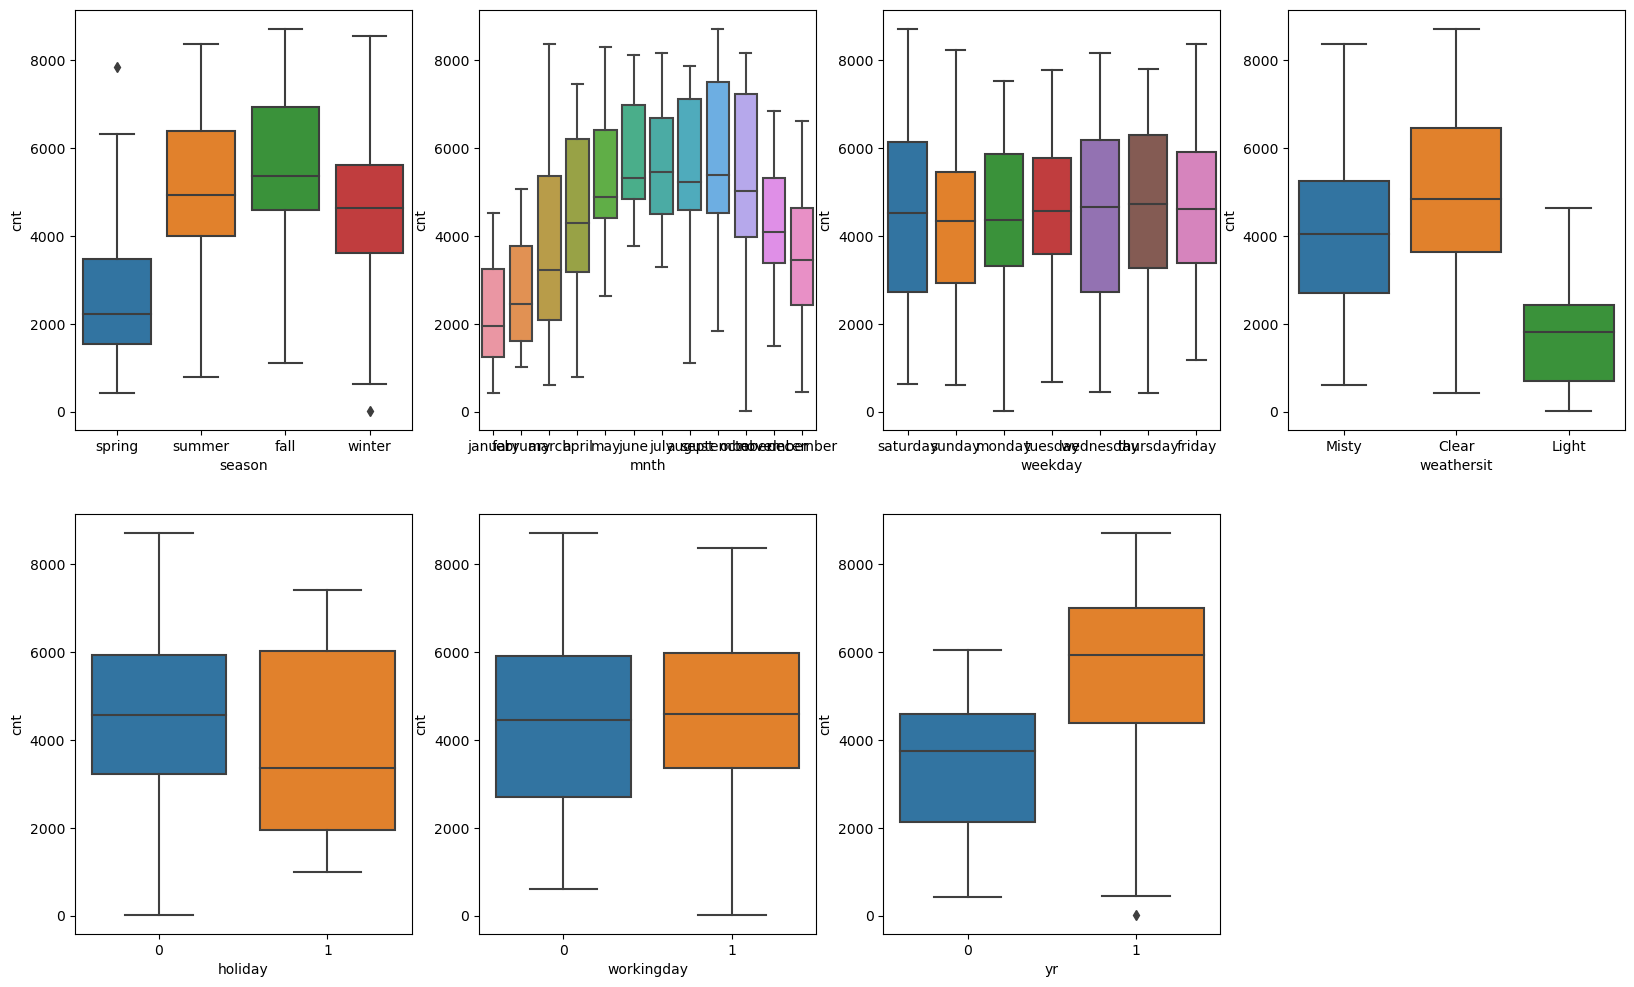

In [12]:
#Analysing the categorical columns against the target column 'cnt'
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=lin_dataset)
plt.subplot(2,4,2)
sns.boxplot(x='mnth',y='cnt',data=lin_dataset)
plt.subplot(2,4,3)
sns.boxplot(x='weekday',y='cnt',data=lin_dataset)
plt.subplot(2,4,4)
sns.boxplot(x='weathersit',y='cnt',data=lin_dataset)
plt.subplot(2,4,5)
sns.boxplot(x='holiday',y='cnt',data=lin_dataset)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=lin_dataset)
plt.subplot(2,4,7)
sns.boxplot(x='yr',y='cnt',data=lin_dataset)
plt.show()

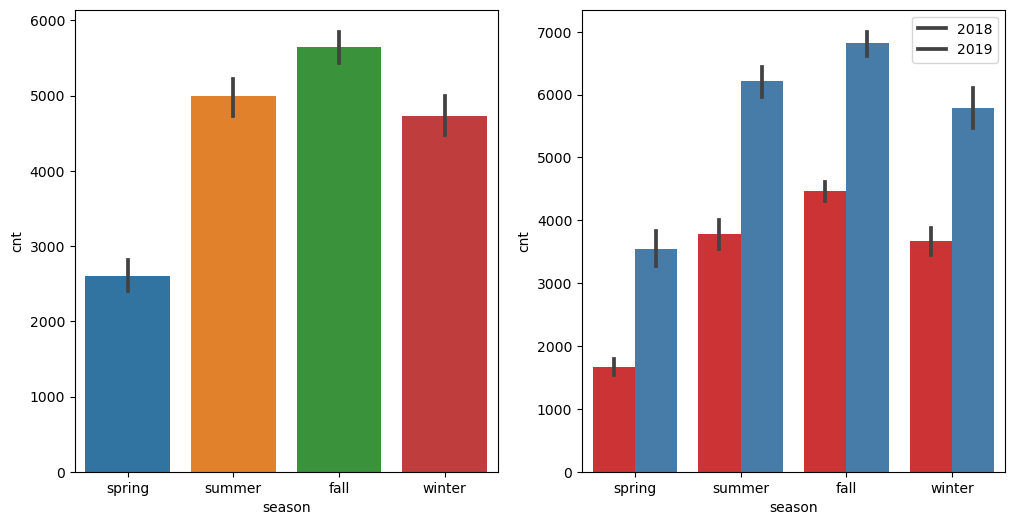

In [13]:
#Plotting barplots for segmented analysis of columns
#Plotting for 'season' column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data=lin_dataset)
plt.subplot(1,2,2)
sns.barplot(x='season',y='cnt',data=lin_dataset, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

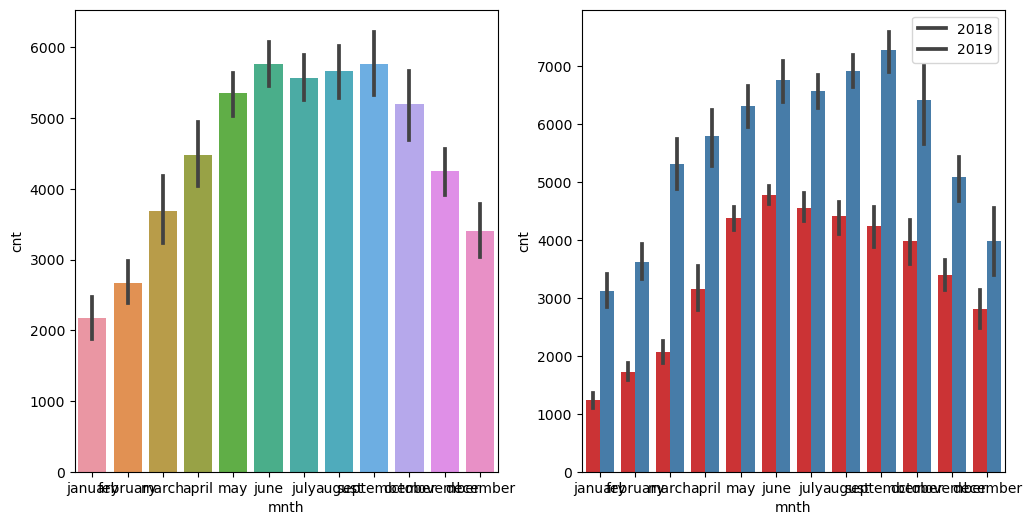

In [14]:
#Plotting for 'month' column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='mnth',y='cnt',data=lin_dataset)
plt.subplot(1,2,2)
sns.barplot(x='mnth',y='cnt',data=lin_dataset, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

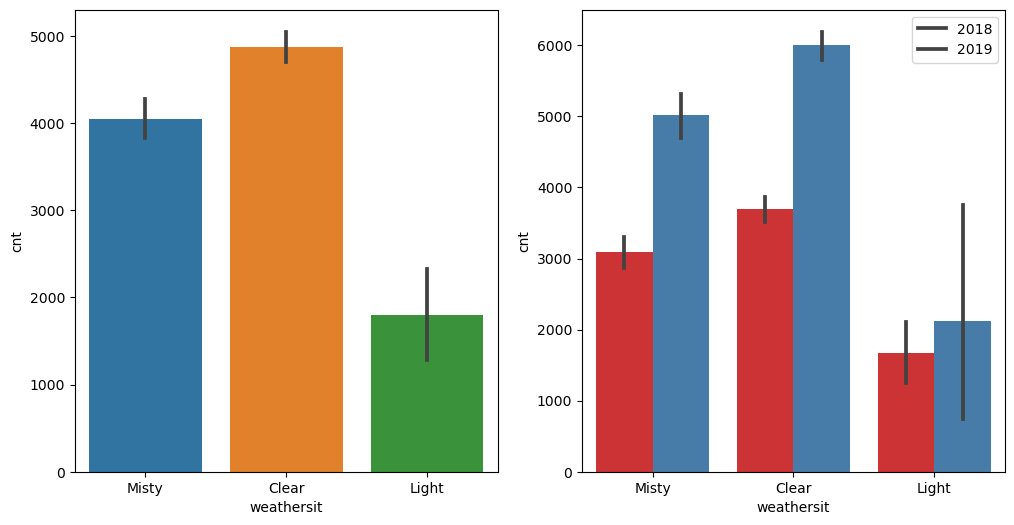

In [15]:
#Plotting for 'weathersit' column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='weathersit',y='cnt',data=lin_dataset)
plt.subplot(1,2,2)
sns.barplot(x='weathersit',y='cnt',data=lin_dataset, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

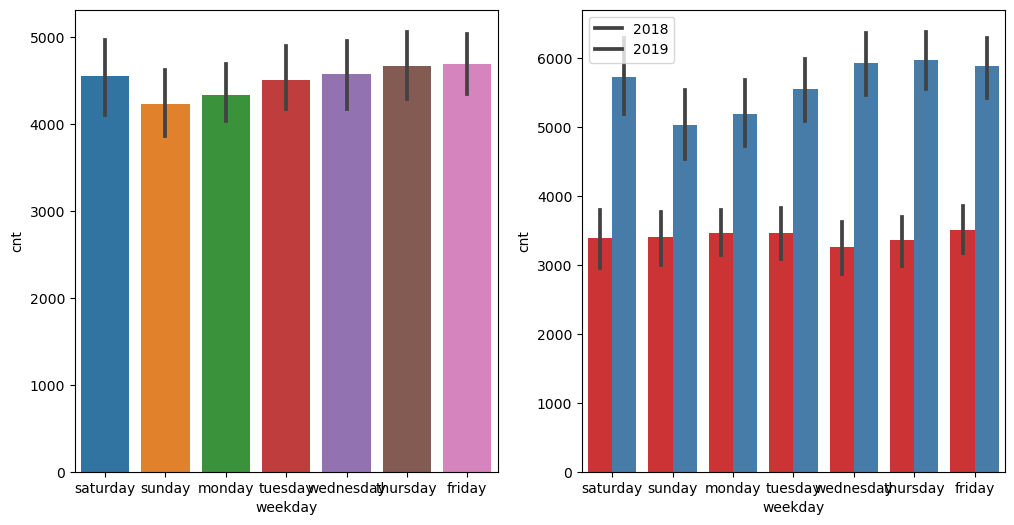

In [16]:
#Plotting for 'weekday' column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt',data=lin_dataset)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='cnt',data=lin_dataset, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

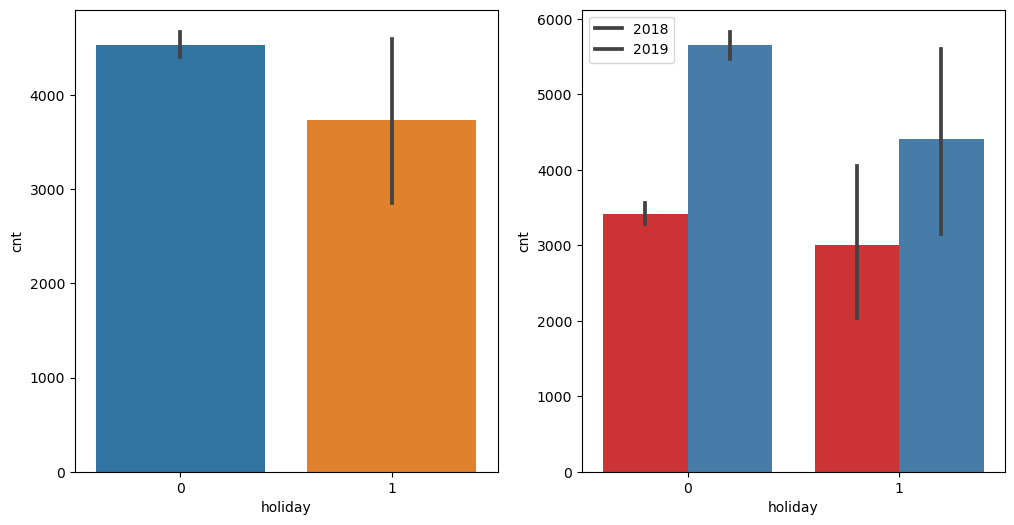

In [17]:
#Plotting for 'holiday' column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='holiday',y='cnt',data=lin_dataset)
plt.subplot(1,2,2)
sns.barplot(x='holiday',y='cnt',data=lin_dataset, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

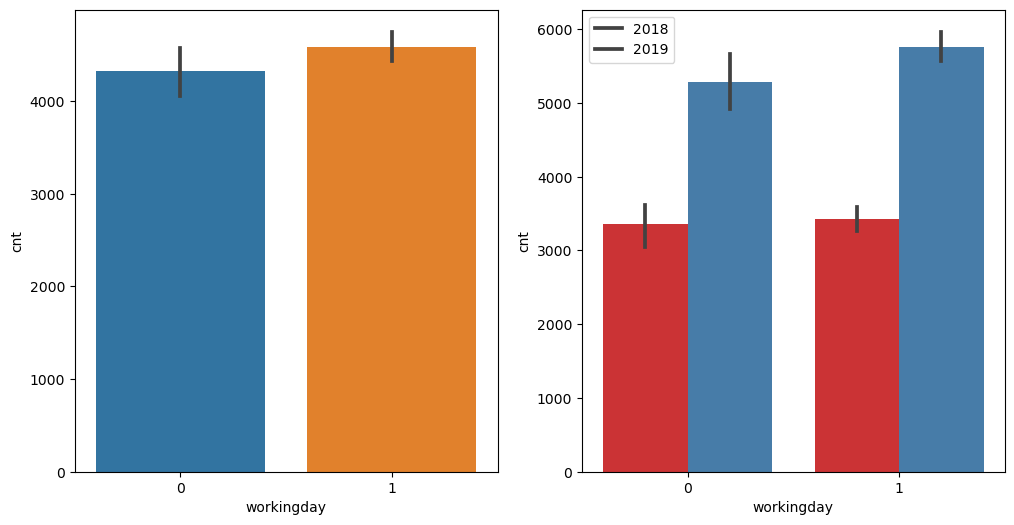

In [18]:
#Plotting for 'workingday' column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='workingday',y='cnt',data=lin_dataset)
plt.subplot(1,2,2)
sns.barplot(x='workingday',y='cnt',data=lin_dataset, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

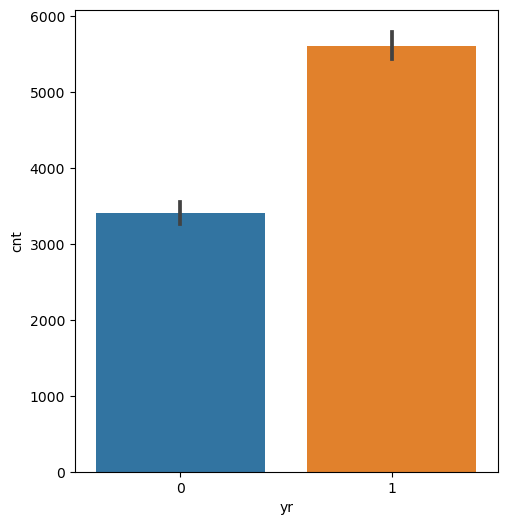

In [19]:
#Plotting for 'year' column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='yr',y='cnt',data=lin_dataset)
plt.show()

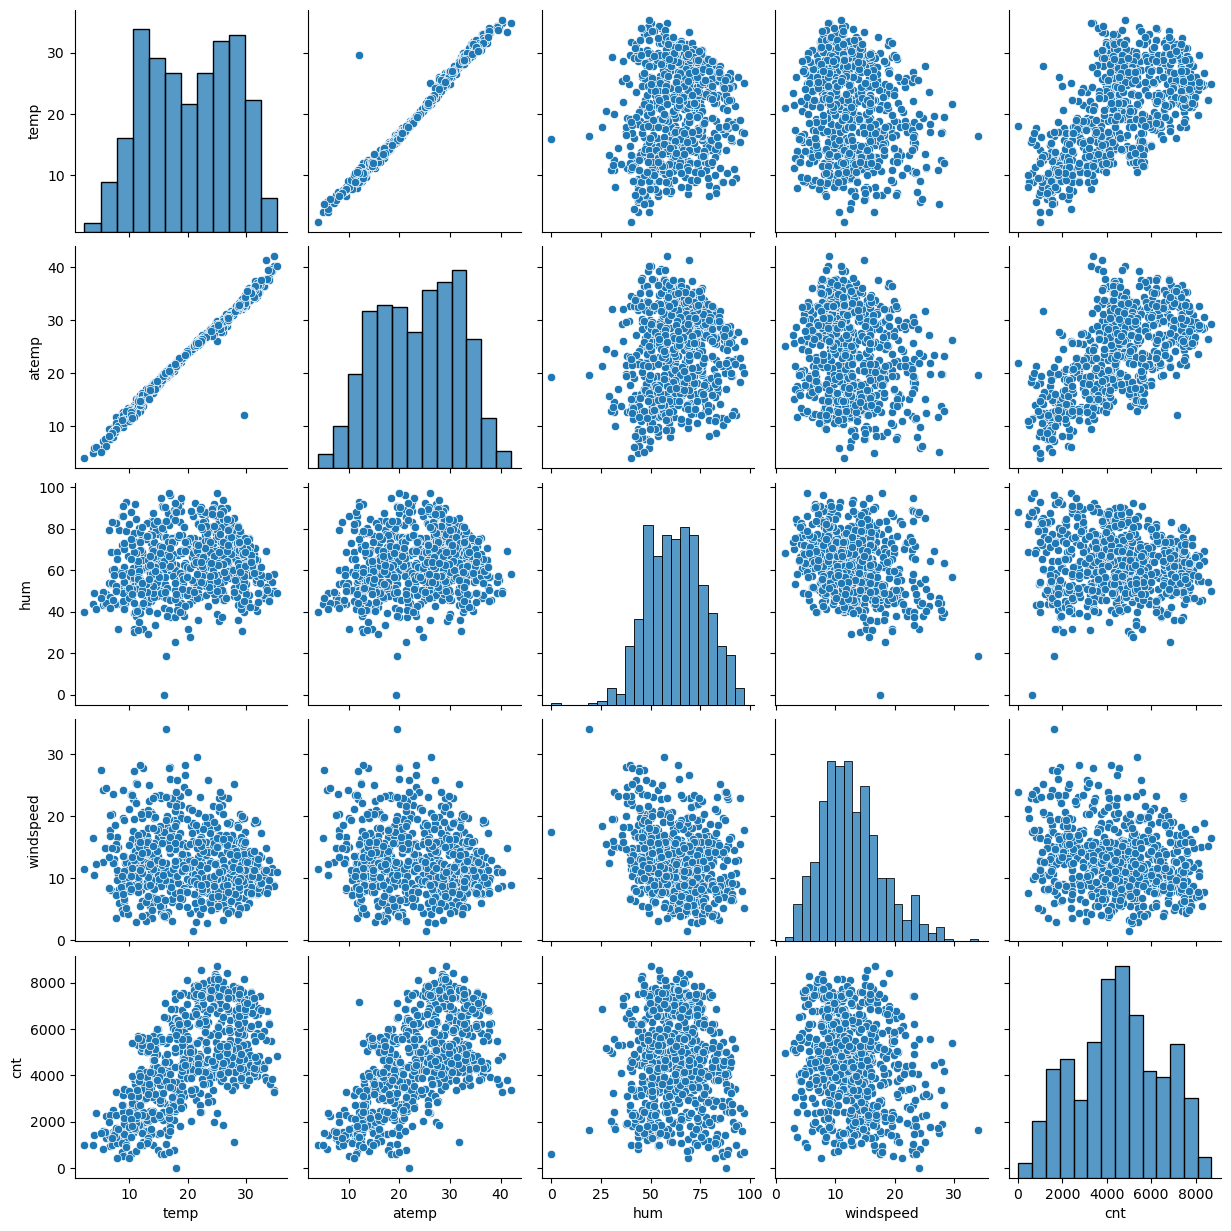

In [20]:
#Analysing the numerical columns against the target column 'cnt'
sns.pairplot(data=lin_dataset,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

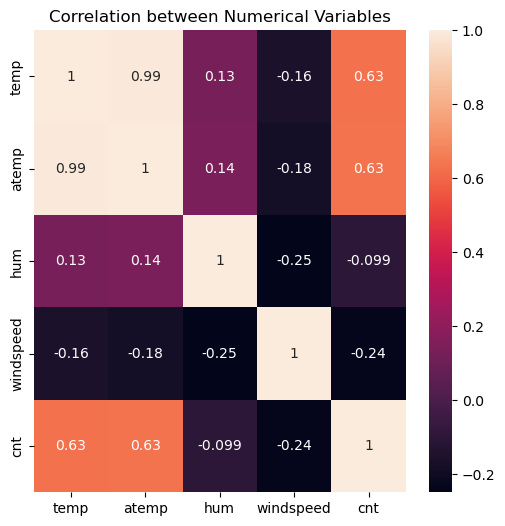

In [21]:
#Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(lin_dataset[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

### Preprocessing the Dataset before building the model

In [22]:
#Dummy variable creation for month
months_dataset=pd.get_dummies(lin_dataset.mnth,drop_first=True)
months_dataset.head()
season_dataset=pd.get_dummies(lin_dataset.season,drop_first=True)

In [23]:
#Dummy variable creation for weekday
weekday_dataset=pd.get_dummies(lin_dataset.weekday,drop_first=True)
weekday_dataset.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True


In [24]:
#Dummy variable creation for weathersit
weathersit_dataset=pd.get_dummies(lin_dataset.weathersit,drop_first=True)
weathersit_dataset.head()

,Light,Misty
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False


In [25]:
#Dummy variable creation for season
season_dataset=pd.get_dummies(lin_dataset.season,drop_first=True)
season_dataset.head()

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [26]:
#Merging the dataset with the dummy variable dataset
new_dataset=pd.concat([lin_dataset,months_dataset,weekday_dataset,weathersit_dataset,season_dataset],axis=1)

In [27]:
#Checking the merged dataset
new_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,saturday,sunday,thursday,tuesday,wednesday,Light,Misty,spring,summer,winter
0,spring,0,january,0,saturday,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,january,0,sunday,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [28]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  august      730 non-null    bool   
 13  december    730 non-null    bool   
 14  february    730 non-null    bool   
 15  january     730 non-null    bool   
 16  july        730 non-null    bool   
 17  june        730 non-null    bool   
 18  march       730 non-null    bool   
 19  may         730 non-null    b

In [29]:
#Changing the datatype of dummy variables from bool to int64 and object to int64
new_dataset.august=new_dataset.august.astype('uint8')
new_dataset.december=new_dataset.december.astype('uint8')
new_dataset.february=new_dataset.february.astype('uint8')
new_dataset.january=new_dataset.january.astype('uint8')
new_dataset.july=new_dataset.july.astype('uint8')
new_dataset.june=new_dataset.june.astype('uint8')
new_dataset.march=new_dataset.march.astype('uint8')
new_dataset.may=new_dataset.may.astype('uint8')
new_dataset.november=new_dataset.november.astype('uint8')
new_dataset.october=new_dataset.october.astype('uint8')
new_dataset.september=new_dataset.september.astype('uint8')
new_dataset.monday=new_dataset.monday.astype('uint8')
new_dataset.saturday=new_dataset.saturday.astype('uint8')
new_dataset.sunday=new_dataset.sunday.astype('int64')
new_dataset.thursday=new_dataset.thursday.astype('int64')
new_dataset.tuesday=new_dataset.tuesday.astype('uint8')
new_dataset.wednesday=new_dataset.wednesday.astype('uint8')
new_dataset.Light=new_dataset.Light.astype('uint8')
new_dataset.Misty=new_dataset.Misty.astype('uint8')
new_dataset.spring=new_dataset.spring.astype('uint8')
new_dataset.summer=new_dataset.summer.astype('uint8')
new_dataset.winter=new_dataset.winter.astype('uint8')
new_dataset.yr=new_dataset.yr.astype('int64')

In [30]:
#checking the datatypes of all columns after conversion
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  august      730 non-null    uint8  
 13  december    730 non-null    uint8  
 14  february    730 non-null    uint8  
 15  january     730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  march       730 non-null    uint8  
 19  may         730 non-null    u

In [31]:
#dropping unnecessary columns after merging the dummy variables
new_dataset.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

## Step4: Splitting the Dataset into test and training set

In [32]:
#splitting the dataset into train and test sets
new_train,new_test=train_test_split(new_dataset,train_size=0.7,random_state=100)

In [33]:
#checking the shape of training set
new_train.shape

(510, 30)

In [34]:
#checking the shape of testing set
new_test.shape

(220, 30)

In [35]:
#checking the head of the training set
new_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Light,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


### Scaling the Dataset using MinMaxScaler

In [36]:
#scaling the numerical variables using MinMaxScaler
scaler=MinMaxScaler()
num_vars=['temp','atemp','hum','windspeed','cnt']
new_train[num_vars]=scaler.fit_transform(new_train[num_vars])

In [37]:
#checking the head of training data after scaling the variables
new_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Light,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


### Checking the correlation coefficients and the data spread of 'temp' and 'cnt'

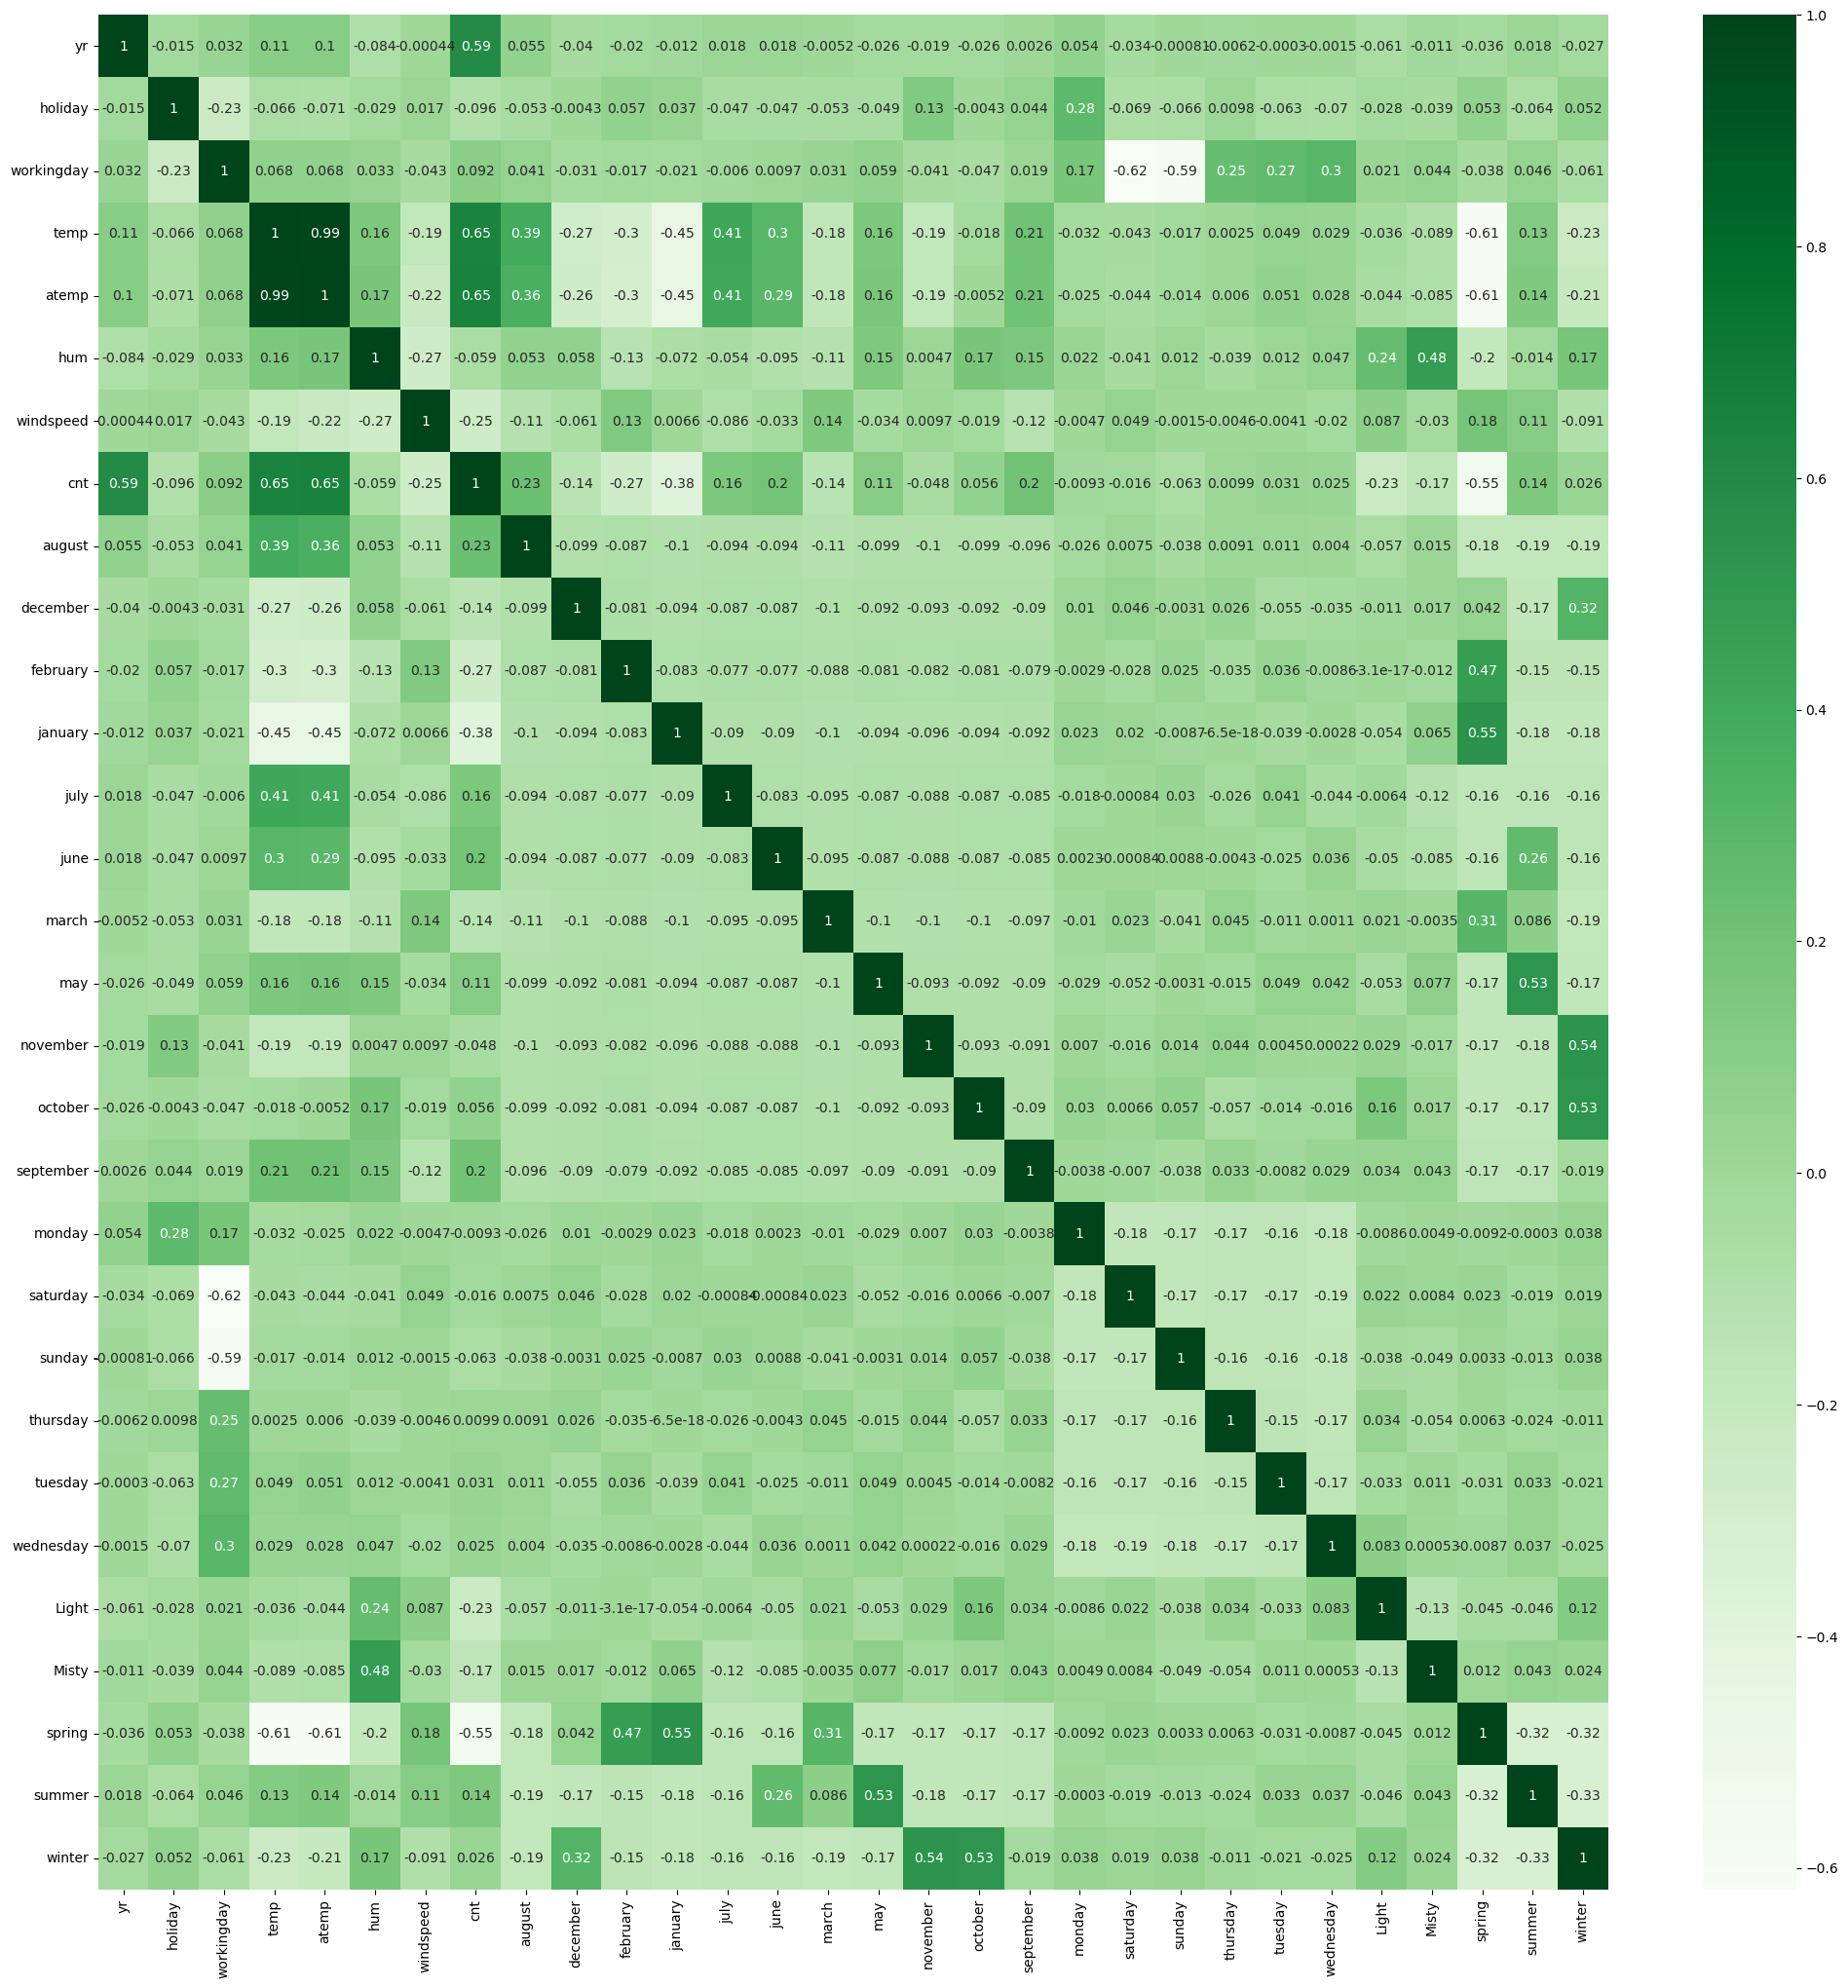

In [38]:
#checking the correlation coefficients
plt.figure(figsize = (25,25))
#sns.color_palette("rocket", as_cmap=True)
sns.heatmap(new_train.corr(), annot = True,cmap='Greens')
plt.show()

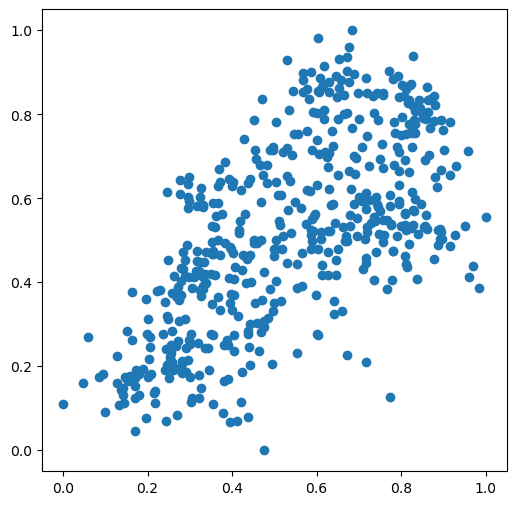

In [39]:
#visualizing the scatter trend of 'cnt' and 'temp'
plt.figure(figsize=[6,6])
plt.scatter(new_train.temp, new_train.cnt)
plt.show()

## Step5: Choosing the variables to include in our model using Recursive Feature Elimination

In [40]:
#building the linear model
y_train=new_train.pop('cnt')
x_train=new_train
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [41]:
#recursive feature elimination
rfe=RFE(estimator=lm, n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [42]:
#list of variables selected in top 15
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('august', False, 12),
 ('december', False, 3),
 ('february', False, 5),
 ('january', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 11),
 ('may', False, 6),
 ('november', False, 4),
 ('october', False, 9),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 10),
 ('tuesday', False, 7),
 ('wednesday', False, 13),
 ('Light', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [43]:
#selecting the variables via rfe
col=x_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'september', 'saturday', 'sunday', 'Light', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [44]:
#creating the dataset containing the rfe selected variables
x_train_rfe=x_train[col]
x_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,july,september,saturday,sunday,Light,Misty,spring,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,1,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,0,0,1,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,0,0,1,0,0


In [45]:
#calculating variance inflation factor of the chosen variables
vif=pd.DataFrame()
vif['columns']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe,i) for i in range(x_train_rfe.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
3,temp,52.823599
4,atemp,51.479909
2,workingday,40.813752
9,saturday,9.957091
10,sunday,9.672858
13,spring,2.545685
1,holiday,2.540190
5,hum,1.897375
14,winter,1.786224
12,Misty,1.568512


## Step6: Building and Fitting the model

In [46]:
#building the 1st linear model
x_train_1=sm.add_constant(x_train_rfe)
lm_1=sm.OLS(y_train,x_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.89e-189
Time:                        12:08:19   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.025      9.587      0.0

As we can see from the OLS stats and the vif dataset,'atemp' has both high VIF and high p value. Thus we can drop it from our model.

In [47]:
#As 'atemp' has a high VIF and p value ,we can drop it
x_train_d1=x_train_rfe.drop(['atemp'],axis=1)

In [48]:
#VIF of new training set
vif=pd.DataFrame()
vif['columns']=x_train_d1.columns
vif['VIF']=[variance_inflation_factor(x_train_d1,i) for i in range(x_train_d1.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
2,workingday,40.651573
8,saturday,9.920819
9,sunday,9.635984
3,temp,2.993028
12,spring,2.545046
1,holiday,2.538834
4,hum,1.889156
13,winter,1.775303
11,Misty,1.566684
6,july,1.296563


We build a new model again with the new dataset devoid of 'atemp'

In [49]:
#building the 2nd linear model
x_train_2=sm.add_constant(x_train_d1)
lm_2=sm.OLS(y_train,x_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.38e-190
Time:                        12:08:19   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2435      0.025      9.653      0.0

As we can see from the OLS stats that the p value of 'holiday' is very high. Thus we drop it from our dataset.

In [50]:
#As 'holiday' has a high p value,hence we can drop it
x_train_d1=x_train_d1.drop(['holiday'],axis=1)

In [51]:
#VIF of new training set
vif=pd.DataFrame()
vif['columns']=x_train_d1.columns
vif['VIF']=[variance_inflation_factor(x_train_d1,i) for i in range(x_train_d1.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
3,hum,29.193623
2,temp,17.251444
1,workingday,16.913231
7,saturday,4.565225
4,windspeed,4.521779
8,sunday,4.449928
11,spring,2.786264
10,Misty,2.278743
12,winter,2.144718
0,yr,2.078805


We build a new model again with the new dataset devoid of 'holiday'

In [52]:
#building the 3rd linear model
x_train_3=sm.add_constant(x_train_d1)
lm_3=sm.OLS(y_train,x_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.38e-190
Time:                        12:08:19   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.040      5.915      0.0

As we can see the VIF of 'hum' is very high.Thus we can drop it from our dataset.

In [53]:
#As 'hum' or humidity has a high VIF,we can drop it
x_train_d1=x_train_d1.drop(['hum'],axis=1)

In [54]:
#VIF of new training set
vif=pd.DataFrame()
vif['columns']=x_train_d1.columns
vif['VIF']=[variance_inflation_factor(x_train_d1,i) for i in range(x_train_d1.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
1,workingday,13.116893
2,temp,12.383838
3,windspeed,4.478417
6,saturday,3.765389
7,sunday,3.535690
10,spring,2.439190
0,yr,2.068352
11,winter,1.775498
9,Misty,1.580008
4,july,1.370213


We build a new model again with the new dataset devoid of 'hum'

In [55]:
#building the 4th linear model
x_train_4=sm.add_constant(x_train_d1)
lm_4=sm.OLS(y_train,x_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.26e-187
Time:                        12:08:19   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1553      0.035      4.475      0.0

As we can see 'workingday' has a very high VIF.Thus we can drop it from our dataset.

In [56]:
#as 'workingday' has a high VIF,we can drop it
x_train_d1=x_train_d1.drop(['workingday'],axis=1)

In [57]:
#VIF of new training set
vif=pd.DataFrame()
vif['columns']=x_train_d1.columns
vif['VIF']=[variance_inflation_factor(x_train_d1,i) for i in range(x_train_d1.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
1,temp,4.723267
2,windspeed,4.036455
0,yr,2.056631
9,spring,1.658695
8,Misty,1.517217
10,winter,1.408250
3,july,1.354006
5,saturday,1.218721
6,sunday,1.205231
4,september,1.197181


We build a new model again with the new dataset devoid of 'workingday'

In [58]:
#building the 5th linear model
x_train_5=sm.add_constant(x_train_d1)
lm_5=sm.OLS(y_train,x_train_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.84e-185
Time:                        12:08:19   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2558      0.024     10.619      0.0

As we can see from the OLS stats,'saturday' has a high p value.Thus we can drop it from our dataset.

In [59]:
#as 'saturday' has a high p value,we can drop it
x_train_d1=x_train_d1.drop(['saturday'],axis=1)

In [60]:
#VIF of new training set
vif=pd.DataFrame()
vif['columns']=x_train_d1.columns
vif['VIF']=[variance_inflation_factor(x_train_d1,i) for i in range(x_train_d1.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
1,temp,4.669640
2,windspeed,4.002582
0,yr,2.055650
8,spring,1.644231
7,Misty,1.516584
9,winter,1.395664
3,july,1.353763
4,september,1.197176
5,sunday,1.170334
6,Light,1.081519


We build a new model again with the new dataset devoid of 'saturday'

In [61]:
#building the 6th linear model
x_train_6=sm.add_constant(x_train_d1)
lm_6=sm.OLS(y_train,x_train_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.75e-186
Time:                        12:08:19   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2586      0.024     10.768      0.0

'july' has a high correlation with temp as seen from the correlation matrix above.Thus we can drop it from our dataset.

In [62]:
#as we can see 'july' has a high correlation with temp,we can drop it
x_train_d1=x_train_d1.drop(['july'],axis=1)

In [63]:
#VIF of new training set
vif=pd.DataFrame()
vif['columns']=x_train_d1.columns
vif['VIF']=[variance_inflation_factor(x_train_d1,i) for i in range(x_train_d1.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
2,windspeed,3.942758
1,temp,3.827130
0,yr,2.050326
7,spring,1.641951
6,Misty,1.499582
8,winter,1.367468
4,sunday,1.169769
3,september,1.155659
5,Light,1.081224


We build a new model again with the new dataset devoid of 'july'

In [64]:
#building the 7th model
x_train_7=sm.add_constant(x_train_d1)
lm_7=sm.OLS(y_train,x_train_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.98e-184
Time:                        12:08:19   Log-Likelihood:                 486.21
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     500   BIC:                            -910.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2735      0.024     11.359      0.0

We can consider the above model(lm_7),since all the predictors used in this model have a p value of '0'.which means all the variables are significant.
Moreover,the P(F) value of the model is 3.98e-184 which is very close to 0 and a F statistic value of 265 proves that the model is significant.
The R-squared value of 0.82 suggests that the model explains 82% of all the data.

## Step7: Residual Analysis of the train dataset and validation of the Linear Model

In [65]:
x_train_7.head()

,const,yr,temp,windspeed,september,sunday,Light,Misty,spring,winter
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,1,1,0
728,1.0,1,0.245101,0.663106,0,1,0,0,1,0
482,1.0,1,0.395666,0.188475,0,0,0,1,0,0
111,1.0,0,0.345824,0.380981,0,0,0,1,0,0


In [66]:
y_train_pred=lm_7.predict(x_train_7)

#### 1.Normality of Error terms

Text(0.5, 0, 'Errors')

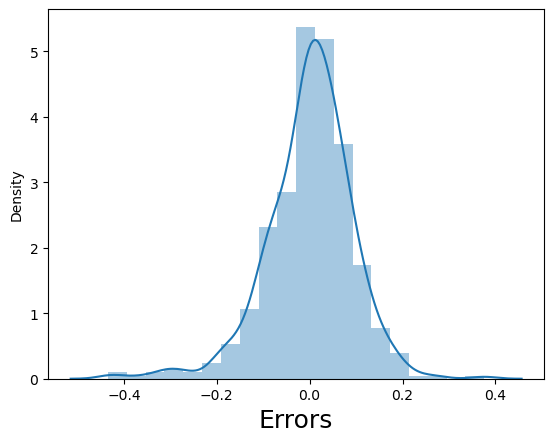

In [67]:
#plotting the histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20) 
plt.xlabel('Errors', fontsize = 18)

The Error terms are following normal distribution.

#### 2.Multi Collinearity

In [68]:
#VIF of the newest training set
vif=pd.DataFrame()
vif['columns']=x_train_d1.columns
vif['VIF']=[variance_inflation_factor(x_train_d1,i) for i in range(x_train_d1.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,columns,VIF
2,windspeed,3.942758
1,temp,3.827130
0,yr,2.050326
7,spring,1.641951
6,Misty,1.499582
8,winter,1.367468
4,sunday,1.169769
3,september,1.155659
5,Light,1.081224


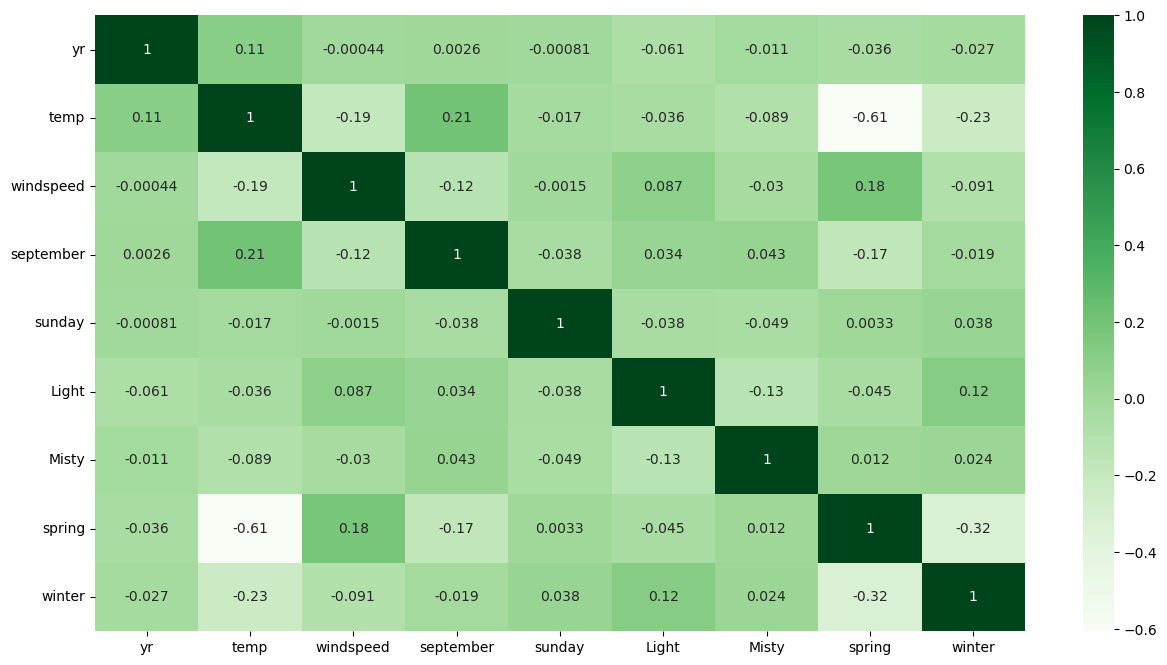

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_d1.corr(),annot = True, cmap="Greens")
plt.show()

We can see from the above correlation matrix that there is no major correlation between any variables and the VIF of all the variables are less than 5.Thus there is no multi collinearity.

#### 3.Linearity

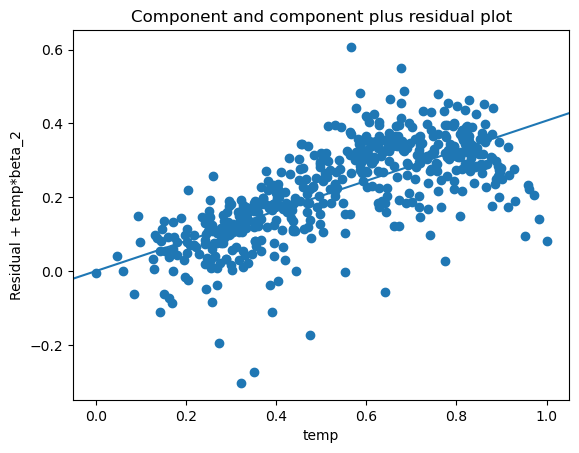

In [79]:
#plotting the CCPR plot
sm.graphics.plot_ccpr(lm_7, 'temp')
plt.show()

We can observe an linear relationship between residual and component vs component plot.

#### 4.Homoscedasticity

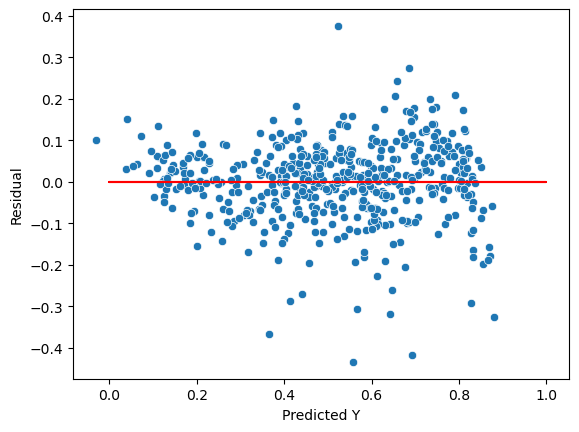

In [71]:
#checking for homoscedasticity
y_train_pred = lm_7.predict(x_train_7)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train_pred,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Predicted Y')
plt.ylabel('Residual')
plt.show()

No clear pattern is visible between residual and y_pred.

## Step8: Making predictions using the final model

In order to make predictions on the test set we need to scale the test set just like the training set.

In [72]:
#scaling the test set
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
new_test[num_vars]=scaler.transform(new_test[num_vars])
new_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Light,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


#### Mapping the test set according to the last training set

In [73]:
#preparing the test set
y_test=new_test.pop('cnt')
x_test=new_test
col1=x_train_d1.columns
x_test=x_test[col1]

#### Calculating the R2 score of the test set 

In [74]:
#calculating r2 score
x_test_7=sm.add_constant(x_test)
y_pred=lm_7.predict(x_test_7)
r2=r2_score(y_test,y_pred)
round(r2,3)

0.805

## Step9: Model Evaluation

Lets plot the predicted values vs actual values and check the pattern

Text(0, 0.5, 'y_pred')

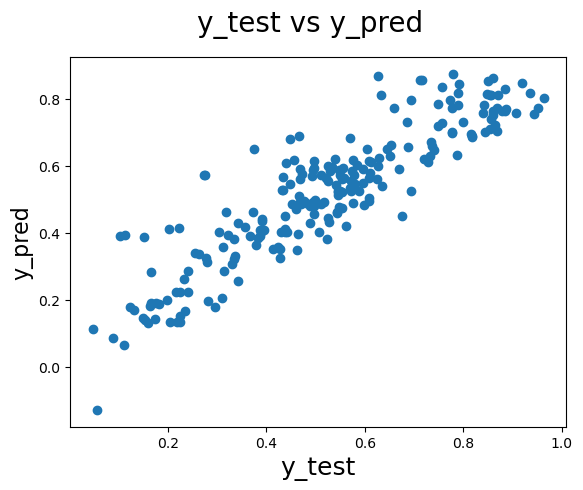

In [75]:
#plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

As we can see the actual values and predicted values have an almost linear spread.

In [76]:
#checking the parameters
lm_7.params

const        0.273457
yr           0.235785
temp         0.407393
windspeed   -0.136929
september    0.063963
sunday      -0.045916
Light       -0.288037
Misty       -0.077283
spring      -0.119845
winter       0.044526
dtype: float64

Thus the equation of our best fitted line is:

###### cnt = 0.2734 + 0.2357 x yr + 0.4073 x temp - 0.1369 x windspeed + 0.0639 x september - 0.0459 x sunday - 0.2880 x Light - 0.0772 x Misty - 0.1198 x spring + 0.0445 x winter

In [77]:
#calculating the adjusted r2 for the test set
adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),3)
print(adjusted_r2)

0.797


### The Regression Plot:

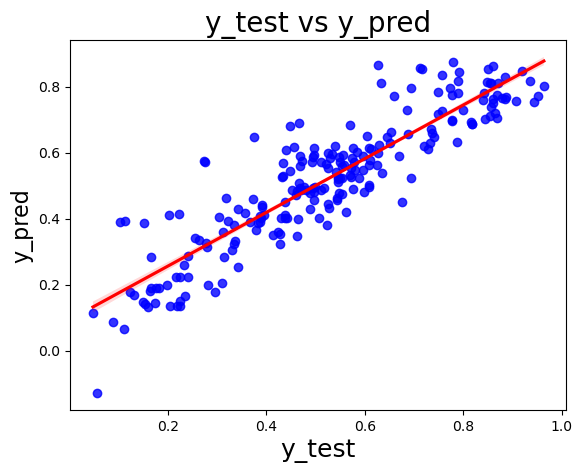

In [78]:
#plotting the regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Insights:
#### Temperature is the most significant feature and has a   positive effect on the amount of bikes being rented.
#### Windspeed and Light rain and Misty conditions have a negative effect on the count which suggests that the bike rentals get effected because of weather conditions.
#### The count is negatively affected on sundays as it is not a working day suggesting that the bike's are being rented by working professionals mostly.
#### The count is positively affected by year suggesting that the count is increasing with each year which we can also see in the barplots.
#### Boom bikes can bump up car rentals by addressing weather concerns for their customers with some other kind of service.
#### Boom bikes can increase rentals on sundays by introducing some other feature or service.
#### Boom bikes can expect their business to grow by 27% without spending anything on any feature to address any issue at all.